In [1]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature selection
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Metrics
from sklearn.metrics import accuracy_score

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [2]:
# Replace 'path_to_csv' with the actual path to your CSV file
df = pd.read_csv('/Users/ahmet/Desktop/Study/second_semester/ds_project/smaller atlas/Data/BSNIP_data/neural/neural_parcellated_gbc.csv')

df = df.drop('Unnamed: 0', axis=1)
df['binary_target'] = (df['Group'] == 'CON').astype(int)
unique_value_counts_binary = df['binary_target'].value_counts()
unique_value_counts_multiclass = df['Group'].value_counts()
print(unique_value_counts_binary)
print(unique_value_counts_multiclass)
# Create a list of the new column order
columns = ['binary_target', 'Group'] + [col for col in df.columns if col not in ['binary_target', 'Group']]

# Reindex the DataFrame with the new column order
df = df[columns]
df.head()

binary_target
0    436
1    202
Name: count, dtype: int64
Group
CON     202
SCZP    167
BPP     150
SADP    119
Name: count, dtype: int64


,binary_target,Group,X1,X2,X3,X4,X5,X6,X7,X8,...,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718
0,0,SADP,0.017901,0.009985,0.003740,0.012205,0.005254,0.023362,0.009241,-0.013089,...,0.014800,-0.000650,-0.007422,-0.003942,0.005397,0.000533,0.013678,-0.014425,0.000760,0.000889
1,0,SCZP,0.006281,0.014014,-0.005585,-0.000536,0.003254,0.008885,0.008263,-0.007209,...,-0.002154,0.007586,0.004824,0.008781,-0.007612,0.005459,0.004697,0.002705,0.008613,0.005739
2,0,BPP,-0.011590,0.009900,-0.008592,-0.009722,0.001935,0.016690,0.007919,-0.006034,...,-0.003193,-0.018124,0.012447,-0.000854,-0.003363,0.001340,-0.007613,0.001474,-0.003668,0.005865
3,0,SCZP,0.017341,0.009125,0.001433,0.005714,0.000891,0.004737,0.000913,-0.004097,...,-0.006566,0.018083,0.007969,0.005143,0.010550,0.000927,0.015112,0.003535,0.008583,0.006735
4,0,SADP,-0.025011,0.031992,-0.037631,-0.024702,-0.009084,-0.002958,0.031740,0.018152,...,-0.004469,0.037608,0.032018,0.005771,0.000471,0.017834,0.020844,0.039692,0.029756,0.003653


In [3]:
seed = 123

binary_data = df.drop('binary_target', axis=1)
input_features = binary_data.drop('Group', axis=1)
# Initialize the LabelEncoder
le = LabelEncoder()
targets_numeric = le.fit_transform(binary_data['Group'])

X_train, X_test, y_train, y_test = train_test_split(input_features, targets_numeric, 
                                                    test_size=0.2, random_state=seed)

### Drop constant and quasi contstant features

In [60]:
sel = DropConstantFeatures(tol = 1, variables = None, missing_values = 'raise')
sel.fit(X_train)
sel.features_to_drop_

[]

In [61]:
sel  = DropConstantFeatures(tol = .998, variables = None, missing_values = 'raise')
sel.fit(X_train)
sel.features_to_drop_

[]

There is no constant or quasi constant features in the data.

### Correlation

#### Brute force approach

In [62]:
sel = DropCorrelatedFeatures(threshold = 0.8,
                           method = 'pearson',
                           missing_values = 'ignore')
sel.fit(X_train)
sel.correlated_feature_sets_

[{'X1', 'X181', 'X184', 'X4'},
 {'X185', 'X5', 'X6'},
 {'X188', 'X231', 'X8'},
 {'X189', 'X233', 'X53', 'X9'},
 {'X13', 'X193'},
 {'X14', 'X194'},
 {'X15', 'X195'},
 {'X210', 'X30'},
 {'X211', 'X31'},
 {'X212', 'X32'},
 {'X213', 'X33'},
 {'X214', 'X34', 'X35'},
 {'X216', 'X36'},
 {'X218', 'X38'},
 {'X220', 'X40', 'X41'},
 {'X232', 'X52'},
 {'X235', 'X55'},
 {'X249', 'X69'},
 {'X250', 'X70'},
 {'X113', 'X99'},
 {'X105', 'X285'},
 {'X106', 'X109', 'X286'},
 {'X108', 'X288'},
 {'X114', 'X115', 'X294'},
 {'X119', 'X299', 'X405'},
 {'X120', 'X300', 'X661'},
 {'X131', 'X311'},
 {'X167', 'X347'},
 {'X361', 'X481'},
 {'X370', 'X558', 'X640'},
 {'X386', 'X577'},
 {'X398', 'X591'},
 {'X402', 'X403', 'X596'},
 {'X404', 'X447'},
 {'X407', 'X626'},
 {'X419', 'X423', 'X479', 'X516', 'X518'},
 {'X426', 'X457'},
 {'X427', 'X609'},
 {'X433', 'X438'},
 {'X445', 'X660'},
 {'X449', 'X471'},
 {'X454', 'X544'},
 {'X456', 'X672'},
 {'X458', 'X463'},
 {'X460', 'X465'},
 {'X462', 'X582'},
 {'X467', 'X613'},
 {

In [63]:
len(sel.features_to_drop_)

84

In [64]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((510, 634), (128, 634))

### Mutual Information

In [65]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.22089595, 0.14812267, 0.17494842, 0.17899905, 0.07738846,
       0.28728684, 0.19571773, 0.24079457, 0.10985123, 0.17416829,
       0.11545675, 0.15345955, 0.21338124, 0.08954205, 0.12362273,
       0.20745045, 0.1138632 , 0.10013089, 0.13522228, 0.17745011,
       0.12759344, 0.18308913, 0.13226214, 0.29107467, 0.1781024 ,
       0.21439226, 0.18673922, 0.11672385, 0.16891354, 0.16371843,
       0.08507397, 0.08790243, 0.19983085, 0.16883595, 0.18308433,
       0.19522412, 0.19250055, 0.1894579 , 0.18969599, 0.20365039,
       0.12954112, 0.11734066, 0.21046716, 0.15824871, 0.21538419,
       0.12163414, 0.24245471, 0.27578622, 0.20747105, 0.17971533,
       0.12774434, 0.17042594, 0.22002334, 0.14344128, 0.16898537,
       0.15751966, 0.187251  , 0.25059059, 0.16248828, 0.1296417 ,
       0.28546311, 0.33112415, 0.2181229 , 0.20239349, 0.27616589,
       0.26016657, 0.16956369, 0.28731292, 0.16404413, 0.24254273,
       0.23706524, 0.26563674, 0.15462275, 0.10682374, 0.08151

In [66]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

X370    0.435085
X404    0.377149
X402    0.371562
X329    0.371164
X592    0.363856
          ...   
X636    0.026124
X499    0.022149
X380    0.016100
X393    0.009234
X643    0.000000
Length: 634, dtype: float64

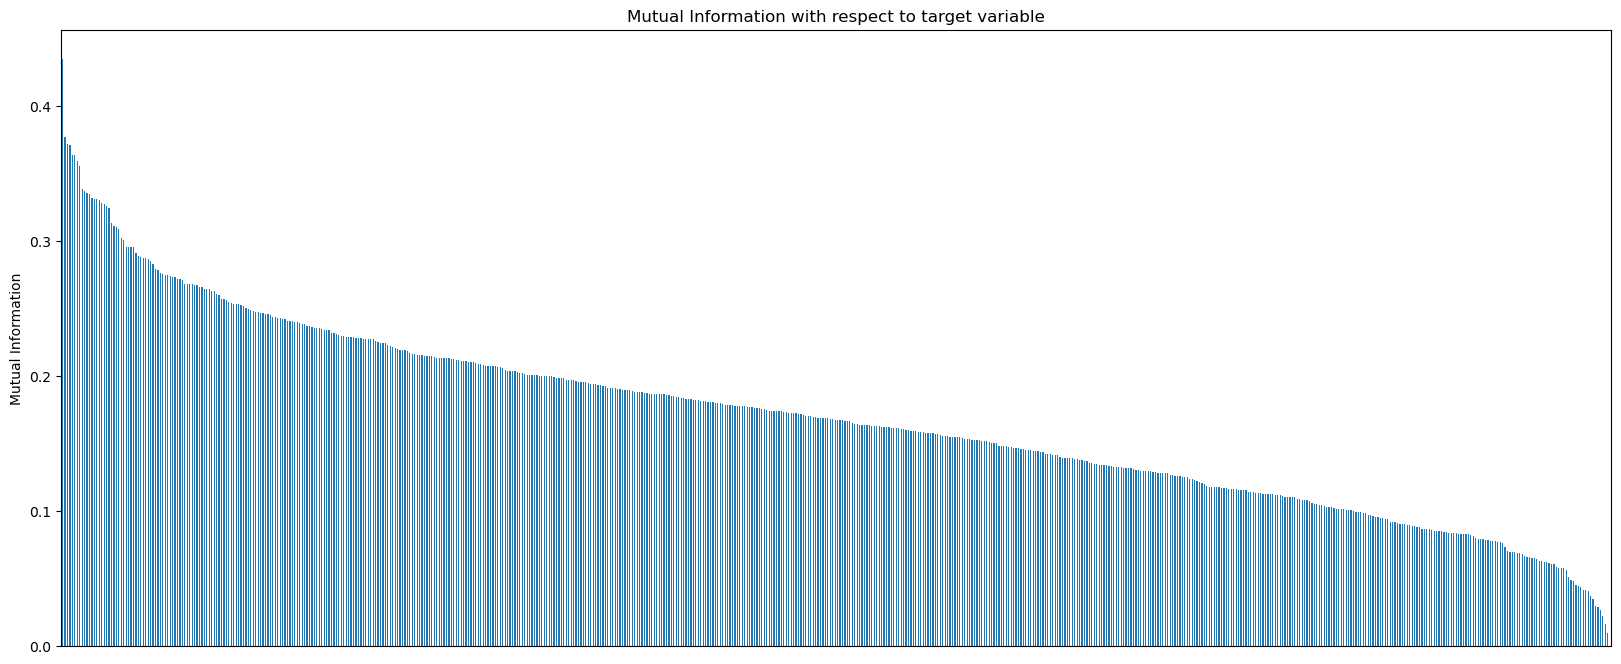

In [195]:
mi_sorted = mi.sort_values(ascending=False)
ax = mi_sorted.plot.bar(figsize=(20, 8))

# Remove x-axis labels
plt.xticks([])
plt.title('Mutual Information with respect to target variable')
plt.ylabel('Mutual Information')
plt.show()

There is no obvious elbow shape in the plot so it's not easy to pick the cut off. I will just remove features that their mutual information is really small (smaller than <0.05)

In [69]:
print(f'Number of features to remove: {len(mi[mi < 0.05].index)}')
mi[mi < 0.05].index

Number of features to remove: 17


Index(['X296', 'X372', 'X375', 'X379', 'X380', 'X384', 'X392', 'X393', 'X396',
       'X475', 'X499', 'X519', 'X524', 'X636', 'X643', 'X671', 'X714'],
      dtype='object')

In [70]:
X_train = X_train[mi[mi > 0.05].index]
X_test = X_test[mi[mi > 0.05].index]

In [71]:
X_train.shape, X_test.shape

((510, 617), (128, 617))

### Anova

In [72]:
univariate = f_classif(X_train, y_train)
univariate

(array([ 5.42505024, 16.50474421,  2.7897694 ,  2.92811521,  1.2079393 ,
         1.50067162,  1.48111336,  3.30646301,  1.24657716, 10.09504957,
         4.033722  ,  2.47582384, 25.11247892,  2.07638886,  1.15941513,
        17.6489983 ,  1.11828727,  4.30170771,  1.13530836,  0.39386682,
         6.22290486, 19.22670808,  5.86151874, 21.54605636, 22.33392874,
         4.88505136, 22.74754845, 19.46067682,  0.41574821, 15.17059111,
         1.61622671,  8.22076066,  2.19577928,  0.1000652 ,  1.15394069,
         1.20913078,  0.24156491,  3.60269789,  0.29993302,  6.10739141,
         5.91238604,  4.23096473,  4.38042151,  5.20534115,  1.67298051,
         2.99081418,  2.35235737,  2.68461187,  4.63033254,  2.50313057,
         1.69861533,  1.79372615,  3.53686194,  4.40518265,  4.17215774,
         1.8491751 , 12.9983062 , 24.25293584,  4.36052259,  7.36231414,
        12.59699213, 67.47383272, 26.66670607, 16.97656077, 47.28886366,
        30.18626157,  7.84028155, 44.99328589,  4.8

In [73]:
univariate  = pd.Series(univariate[1]) # choose the p-values
univariate.index = X_train.columns
univariate.sort_values(ascending = False, inplace = True)

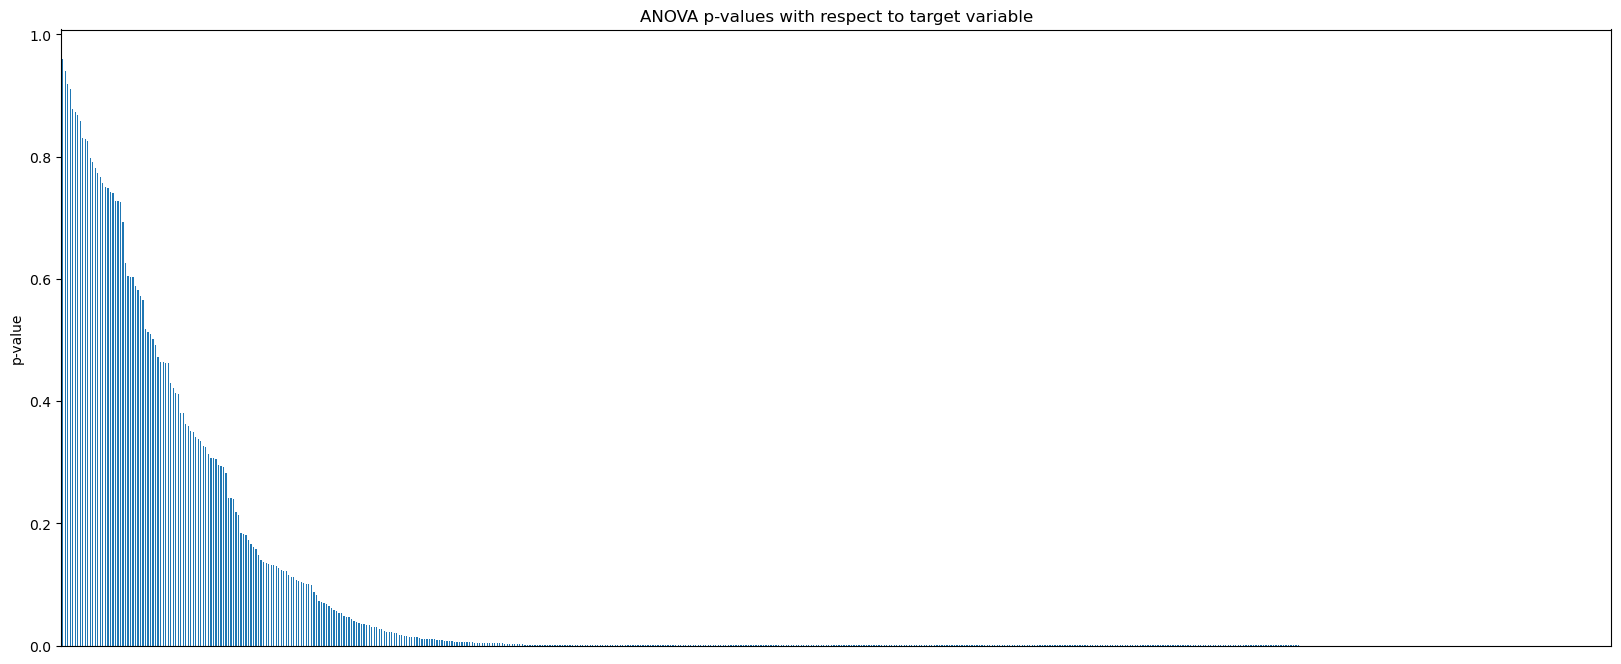

In [196]:
ax = univariate.plot.bar(figsize=(20, 8))

# Remove x-axis labels
plt.xticks([])
plt.title('ANOVA p-values with respect to target variable')
plt.ylabel('p-value')
plt.show()

Lower p value means most predictive features.

In [75]:
print(f'Number of features to be removed: {len(univariate.loc[univariate > 0.05].index)}')

univariate.loc[univariate > 0.05].index

Number of features to be removed: 112


Index(['X37', 'X312', 'X186', 'X497', 'X586', 'X349', 'X40', 'X137', 'X359',
       'X583',
       ...
       'X229', 'X51', 'X108', 'X241', 'X156', 'X14', 'X55', 'X191', 'X687',
       'X78'],
      dtype='object', length=112)

In [76]:
X_train = X_train[univariate.loc[univariate < 0.05].index]
X_test = X_test[univariate.loc[univariate < 0.05].index]

In [77]:
X_train.shape, X_test.shape

((510, 505), (128, 505))

### Univariate Model Performance Based Feature Selection

In [106]:
accuracy_scores = []

for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].to_frame())
    y_scored = np.argmax(y_scored, axis = 1).flatten()
    accuracy_scores.append(accuracy_score(y_test, y_scored))

In [109]:
ac_scores = pd.Series(accuracy_scores)
ac_scores.index = X_train.columns
ac_scores = ac_scores.sort_values(ascending=False)

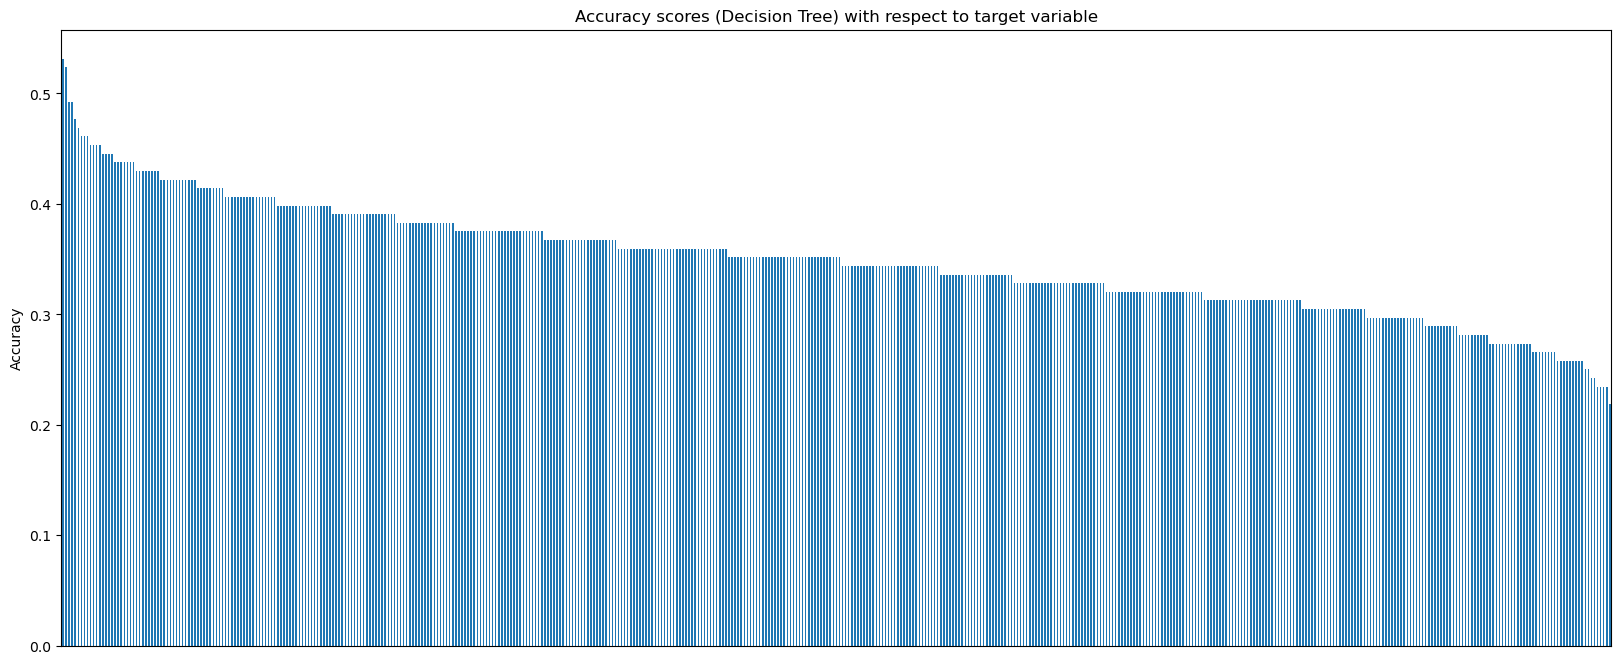

In [197]:
ax = ac_scores.plot.bar(figsize=(20, 8))

plt.xticks([])
plt.title('Accuracy scores (Decision Tree) with respect to target variable')
plt.ylabel('Accuracy')
plt.show()

I will eleminate features which their accuracy is lower than the random classifier. Since we have 4 classes it is going to be 0.25.

In [198]:
print("Number of features that doesn't have prediction power {}".format(len(ac_scores[ac_scores < 0.25])))
ac_scores[ac_scores < 0.25].index

Number of features that doesn't have prediction power 7


Index(['X30', 'X476', 'X620', 'X2', 'X269', 'X680', 'X601'], dtype='object')

In [118]:
X_train = X_train[ac_scores[ac_scores > 0.25].index]
X_test = X_test[ac_scores[ac_scores > 0.25].index]

In [119]:
X_train.shape, X_test.shape

((510, 496), (128, 496))

### Step Forward Feature Selection

In [189]:
sfs = SFS(
    estimator = xgb.XGBClassifier(objective='multi:softmax', max_depth = 3, reg_lambda = 5, n_estimators = 5, seed=11),
    n_features_to_select = 'auto',
    tol = 0.0001,
    direction='forward',
    scoring = 'accuracy',
    cv = 5,
    n_jobs = 4   
)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=3, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=5, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  objective='multi:softmax', ...),
                          n_jobs=4, scoring='accuracy', tol=0.0001)

In [190]:
sfs.get_feature_names_out()

array(['X534', 'X484', 'X426', 'X284', 'X684'], dtype=object)

### Training with selected features

#### Prediction on Train Set

In [191]:
# train a logistic regression model using the selected features for TRAIN
clf = xgb.XGBClassifier(objective='multi:softmax', max_depth = 3, reg_lambda = 5, n_estimators = 5, seed=11)
clf.fit(X_train[sfs.get_feature_names_out()], y_train)
preds = clf.predict(X_train[sfs.get_feature_names_out()])
acc = accuracy_score(y_train, preds)
print(acc)

0.7294117647058823


#### Prediction on Test Set

In [192]:
# For TEST
preds = clf.predict(X_test[sfs.get_feature_names_out()])
acc = accuracy_score(y_test, preds)
print(acc)

0.5703125


### Training with whole features (After few feature selection step)

#### Prediction on Train Set

In [193]:
# train a logistic regression model for TRAIN
clf = xgb.XGBClassifier(objective='multi:softmax', max_depth = 3, reg_lambda = 5, n_estimators = 5, seed=11)
clf.fit(X_train, y_train)
preds = clf.predict(X_train)
acc = accuracy_score(y_train, preds)
print(acc)

0.9196078431372549


#### Prediction on Test Set

In [194]:
# For TEST
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
print(acc)

0.5703125


It's seen that feature elemination reduced some overfitting without losing any performance on the test set. After all of the steps we came from 718 features to 5 features. Seems like most of the features we had actually doesn't have prediction power.

## Test on Binary Target

#### Data Preprocessing

In [21]:
selected_features = ['X534', 'X484', 'X426', 'X284', 'X684']

binary_data = df.drop('Group', axis=1)
input_features = binary_data.drop('binary_target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(input_features[selected_features], binary_data['binary_target'], 
                                                    test_size=0.2, random_state=seed)

### Model Training

#### Prediction on Train Set

In [57]:
# train a logistic regression model for TRAIN
clf = xgb.XGBClassifier(objective='binary:logistic', max_depth = 3, n_estimators = 10, seed=11)
clf.fit(X_train, y_train)
preds = clf.predict(X_train)
acc = accuracy_score(y_train, preds)
print(acc)

0.9882352941176471


#### Prediction on Test Set

In [58]:
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
print(acc)

0.9765625


It's also seen that for binary clasiffication the performance is just dropped around 1% - 1.5%. This also proves the most of the features in the dataset are not informative. The cause of this would be data compression that performed in data preparation step. Squeezing high number of voxels to the areas making us to lost lots of information and the areas are going to be non-distinguishable (more or less similar to each other) by machine learning algorithms.